In [1]:
import tensorflow as tf
import keras
from keras.layers import Conv2D,MaxPool2D,BatchNormalization,Dense,Activation,Flatten,Input,Dropout,UpSampling2D,Conv2DTranspose,MaxPooling2D,Reshape
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential,Model
import os
import numpy as np

Using TensorFlow backend.


In [2]:

input_dim = Input(shape=(28,28,1))
  

x = Conv2D(16,(3,3),activation = 'relu')(input_dim)
x = MaxPool2D((2,2),padding ='same')(x)

  
x = Conv2D(8,(3,3),activation = 'relu')(x)
x = MaxPool2D((2,2),padding ='same')(x)
x = BatchNormalization()(x)

x = UpSampling2D((2,2))(x)  
x = Conv2DTranspose(8,(3,3),activation = 'relu')(x)



x = UpSampling2D((2,2))(x)  
x = Conv2DTranspose(16,(3,3),activation = 'relu',padding='same')(x)


x = Conv2D(1,(3,3),activation = 'sigmoid',padding='same')(x)





model = Model(inputs=input_dim,outputs=x)
model.summary()

W0627 15:12:02.463696 139735150774144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 15:12:02.506734 139735150774144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 15:12:02.514324 139735150774144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 15:12:02.542020 139735150774144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0627 15:12:02.567472 139735150774144 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 8)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 8)           32        
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 12, 12, 8)         0         
__________

In [0]:
from keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_train = x_train.reshape(60000,28,28,1)

In [0]:
x_train_input = x_train/255

In [7]:
model.compile(loss='binary_crossentropy',optimizer= 'adam',metrics=['accuracy'])
model.fit(x_train_input,x_train_input,shuffle=True,epochs=5,validation_split=0.1,batch_size=32)

W0627 15:12:07.748738 139735150774144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0627 15:12:07.772716 139735150774144 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 15s 273us/step - loss: 0.0915 - acc: 0.8129 - val_loss: 0.0787 - val_acc: 0.8148
Epoch 2/5
54000/54000 [==============================] - 11s 206us/step - loss: 0.0758 - acc: 0.8150 - val_loss: 0.0747 - val_acc: 0.8153
Epoch 3/5
54000/54000 [==============================] - 11s 204us/step - loss: 0.0737 - acc: 0.8151 - val_loss: 0.0750 - val_acc: 0.8151
Epoch 4/5
54000/54000 [==============================] - 11s 212us/step - loss: 0.0726 - acc: 0.8152 - val_loss: 0.0728 - val_acc: 0.8154
Epoch 5/5
54000/54000 [==============================] - 11s 203us/step - loss: 0.0721 - acc: 0.8152 - val_loss: 0.0721 - val_acc: 0.8155


In [8]:
x_test.shape

(10000, 28, 28)

In [0]:
x_test = x_test.reshape(10000,28,28,1)
x_test=x_test/255

In [10]:
model.evaluate(x_test,x_test,batch_size=32)

10000/10000 [==============================] - 1s 60us/step


[0.07078394085168839, 0.8143146677017212]

In [0]:
img = x_train[73]
img1 = img.reshape(1,28,28,1)

In [0]:
predictions = model.predict(img1)

In [13]:
print(len(predictions))

1


In [14]:
from google.colab.patches import cv2_imshow
cv2_imshow(img1.reshape(28,28))

In [15]:
predictions = np.array(predictions)
predictions *= 255
cv2_imshow(predictions.reshape(28,28))

In [0]:
import cv2
import pandas as pd 
from sklearn.cluster import KMeans
import numpy as np
from google.colab.patches import cv2_imshow

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
pathforw = 'gdrive/My Drive/W0001/'
pathforbb = 'gdrive/My Drive/10_img_post_cropped/'

In [0]:
aaa=[]
bbb=[]
for img in os.listdir(pathforw):
  if img.endswith('.png'):
    aaa.append(img)
for img in os.listdir(pathforbb):
  if 'bb' in img:
    bbb.append(img)

In [20]:
aaa = sorted(aaa)
bbb = sorted(bbb)
temp = bbb[1]
del(bbb[1])
bbb.append(temp)
markedimages = []
for i in range(len(bbb)):
  markedimages.append(cv2.imread(os.path.join(pathforbb,bbb[i]),0))
uncroppedimages = []
for i in range(len(aaa)):
  uncroppedimages.append(cv2.imread(os.path.join(pathforw,aaa[i]),0))
print(len(markedimages))

10


In [0]:
!cp '/content/gdrive/My Drive/W0001/ground_truth.txt' 'ground_truth.txt'

In [22]:
df = pd.read_csv('ground_truth.txt', sep="   ", header=None)
df.columns = ['id','x1','x2','y1','y2']
for index,row in df.iterrows():
  row['id'] = int(row['id'])
df.index = df['id']
df = df.drop(['id'],axis=1)
df['width'] = df['x2'] - df['x1']
df['height'] = df['y2'] - df['y1']
df1 = df.loc[1]
df1 = df1[['x1','x2','y1','y2','width','height']]
df1.reset_index()
newdf = df.copy()
newdf.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


x1    x2     y1     y2  width  height
id                                          
1.0   8.5  23.5  121.5  130.5   15.0     9.0
1.0   8.5  19.5  148.5  176.5   11.0    28.0
1.0   8.5  33.5  185.5  220.5   25.0    35.0
1.0   8.5  33.5  228.5  253.5   25.0    25.0
1.0  10.5  19.5  134.5  144.5    9.0    10.0

In [23]:
for i in range(len(aaa)):
  image = markedimages[i]
  image1 = uncroppedimages[i]
  res = cv2.matchTemplate(image1,image,eval('cv2.TM_CCOEFF_NORMED'))
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
  top_left = max_loc
  newdf.loc[i+1]['x1'] = newdf.loc[i+1]['x1']-top_left[0]
  newdf.loc[i+1]['x2'] = newdf.loc[i+1]['x2']-top_left[0]
  newdf.loc[i+1]['y1'] = newdf.loc[i+1]['y1']-top_left[1]
  newdf.loc[i+1]['y2'] = newdf.loc[i+1]['y2']-top_left[1]
newdf.head()

x1    x2     y1     y2  width  height
id                                          
1.0 -33.5 -18.5   53.5   62.5   15.0     9.0
1.0 -33.5 -22.5   80.5  108.5   11.0    28.0
1.0 -33.5  -8.5  117.5  152.5   25.0    35.0
1.0 -33.5  -8.5  160.5  185.5   25.0    25.0
1.0 -31.5 -22.5   66.5   76.5    9.0    10.0

In [0]:
for index,row in newdf.iterrows():
  row['x1'] = max(0,row['x1'])
  row['x2'] = max(0,row['x2'])
  row['y1'] = max(0,row['y1'])
  row['y2'] = max(0,row['y2'])

In [0]:
for i in range(len(aaa)): 
  image = markedimages[i]
  #cv2_imshow(image)
  for index,row in newdf.loc[i+1].iterrows():
    x1 = row['x1']
    x2 = row['x2']
    y1 = row['y1']
    y2 = row['y2']
    cv2.rectangle(image,(int(x1),int(y1)),(int(x2),int(y2)),(0,0,0),2)
  #cv2_imshow(image)

In [0]:
ccc = []
for img in os.listdir(pathforbb):
  if 'crp' in img:
    ccc.append(img)

In [0]:
ccc = sorted(ccc)
temp = ccc[1]
del(ccc[1])
ccc.append(temp)
croppedimages=[]
for i in range(len(ccc)):
  croppedimages.append(cv2.imread(os.path.join(pathforbb,ccc[i]),0))

In [0]:
binaryimages = []
testimages = []
for image in croppedimages:
  binaryimages.append(image)
  testimages.append(image)

In [0]:
for i in range(len(binaryimages)):
  binaryimages[i] = np.array(binaryimages[i])
  binaryimages[i][:] = 0

In [30]:
for i in range(len(binaryimages)):
  for index,row in newdf.loc[i+1].iterrows():
    x1 = row['x1']
    x2 = row['x2']
    y1 = row['y1']
    y2 = row['y2']
    cv2.rectangle(binaryimages[i],(int(x1),int(y1)),(int(x2),int(y2)),255, -1)
  cv2_imshow(binaryimages[i])
  cv2_imshow(markedimages[i])

Output hidden; open in https://colab.research.google.com to view.

In [0]:
testimage = []
binarytestimage = []
testimage.append(croppedimages[0])
binarytestimage.append(binaryimages[0])

In [0]:
del croppedimages[0]

In [0]:
del binaryimages[0]

In [32]:
X=[]
whitepixels=[]
for k in range(len(croppedimages)):
  print(k)
  i=32
  height = croppedimages[k].shape[0]
  width = croppedimages[k].shape[1]
  image = binaryimages[k]
  while(i<height):
    j=32
    while(j<width):
      X.append(croppedimages[k][i-32:i,j-32:j])
      count = 0
      for h in range(i-32,i):
        for w in range(j-32,j):
          if image[h][w] == 255:
            count+=1
      whitepixels.append(count)      
      j+=32
    i+=32
print(len(X))

0
1
2
3
4
5
6
7
8
9
22902


In [0]:
total = 32*32
threshold = 0
print(threshold)

0


In [0]:
labelpos = []
labelneg = []
Xpos= []
Xneg=[]
for i in range(len(whitepixels)):
  if whitepixels[i]!= threshold:
    labelpos.append(1)
    Xpos.append(X[i])
  elif whitepixels[i]== threshold:
    labelneg.append(0)
    Xneg.append(X[i])
print(len(Xpos),len(Xneg))

2018 20128


In [33]:
len(whitepixels)

22902

In [0]:
Xneg=[]
for i in range(len(whitepixels)):
  if whitepixels[i] == 0:
    Xneg.append(X[i])

In [0]:
for i in range(len(Xneg)):
  name = 'gdrive/My Drive/nondefectiveimage/negativeimage'+str(i)+'.jpg'
  cv2.imwrite(name,Xneg[i])

In [0]:
from sklearn.utils import shuffle

In [0]:
Xpos = np.array(Xpos)
Xpos.shape

(4069, 64, 64)

In [0]:
Xpos = Xpos.reshape(4069,64,64,1)

In [0]:
Xneg = np.array(Xneg)
Xneg.shape

(87955, 64, 64)

In [0]:
Xneg = Xneg.reshape(87955,64,64,1)

In [0]:
from keras import backend as K
input_dim = Input(shape=(64,64,1))
x = input_dim
x = Conv2D(filters=32,
               kernel_size=3,

               activation='relu',
               padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(filters=64,
               kernel_size=3,
               activation='relu',
               padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(filters=128,
               kernel_size=3,
               activation='relu',
               padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

shape = K.int_shape(x)

x = Flatten()(x)
x = Dense(1024)(x)
latent = Dense(256, name='latent_vector')(x)

encoder = Model(inputs=input_dim,outputs=latent,name='encoder')
encoder.summary()


In [0]:
latent_inputs = Input(shape=(256,), name='decoder_input')
x = Dense(1024)(latent_inputs)
x = Dense(shape[1]*shape[2]*shape[3])(x)
x = Reshape((shape[1], shape[2], shape[3]))(x)

x = Conv2DTranspose(filters=128,
                        kernel_size=3,

                        activation='relu',
                        padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2DTranspose(filters=64,
                        kernel_size=3,

                        activation='relu',
                        padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2DTranspose(filters=32,
                        kernel_size=3,

                        activation='relu',
                        padding='same')(x)
x = UpSampling2D((2, 2))(x)

outputs = Conv2DTranspose(filters=1,
                          kernel_size=3,
                          activation='sigmoid',
                          padding='same',
                          name='decoder_output')(x)



decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

In [0]:
autoencoder = Model(input_dim, decoder(encoder(input_dim)), name='autoencoder')
autoencoder.summary()

In [0]:
Xneg = Xneg/255
Xpos = Xpos/255

In [0]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=15,
                               verbose=1,
                               min_lr=0.5e-6)
from keras.callbacks import ModelCheckpoint
filepath="weights-improvement-{epoch:02d}-{val_loss:.7f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')


In [0]:
autoencoder.compile(loss='mse',optimizer='adam')
autoencoder.fit(Xneg,Xneg,batch_size=32,epochs=50,shuffle=True,validation_split=0.05,callbacks = [reduce_lr])

In [0]:
def create_model():
  input_dim = Input(shape=(64,64,1))
  x = Conv2D(3,(3,3),padding='same',activation='relu')(input_dim)
  x1 = x
  x = Conv2D(64,(3,3),padding='same',activation='relu')(x)
  x2 = x
  x = Conv2D(128,(3,3),padding='same',activation='relu')(x)
  x = MaxPooling2D(pool_size=(2,2))(x)
  x3 = x
  x = Conv2D(256,(3,3),padding='same',activation='relu')(x)
  x = MaxPooling2D(pool_size=(2,2))(x)
  x4 = x
  x = Conv2D(512,(3,3),padding='same',activation='relu')(x)
  x = MaxPooling2D(pool_size=(2,2))(x)
  x = BatchNormalization()(x)
  x = Conv2D(256,(1,1),activation='relu')(x)
  x4 = BatchNormalization()(x4)
  x = UpSampling2D((2, 2))(x)
  x = keras.layers.Add()([x, x4])
  x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
  x3 = BatchNormalization()(x3)
  x = UpSampling2D((2, 2))(x)
  x = keras.layers.Add()([x, x3])
  x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
  x2 = BatchNormalization()(x2)
  x = UpSampling2D((2, 2))(x)
  x = keras.layers.Add()([x, x2])
  x = Conv2D(3,(3,3),activation='relu',padding='same')(x)
  x1 = BatchNormalization()(x1)
  x = keras.layers.Add()([x, x1])
  x = Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)
  model = Model(inputs = input_dim,outputs = x)
  model.summary()
  return model

In [0]:
model = create_model()
model.compile(loss='mse', optimizer='adam')
model.fit(Xneg,Xneg,batch_size=32,epochs=20,shuffle=True,validation_split=0.05,callbacks = [reduce_lr])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 64, 64, 3)    30          input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 64, 64, 64)   1792        conv2d_4[0][0]                   
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 64, 64, 128)  73856       conv2d_5[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [0]:
# model = create_model()
# model.compile(loss='mse', optimizer='adam')    
# model.load_weights('weights-improvement-17-0.00001.hdf5')

In [0]:
losspos= []
for i in range(len(Xpos)):
  ximg = Xpos[i].copy()
  ximg = ximg.reshape(1,64,64,1)
  loss = model.evaluate(ximg,ximg,verbose=0)
  losspos.append(loss)

In [0]:
lossneg= []
for i in range(len(Xneg)):
  ximg1 = Xneg[i].copy()
  ximg1 = ximg1.reshape(1,64,64,1)
  loss = model.evaluate(ximg1,ximg1,verbose=0)
  lossneg.append(loss)

In [0]:
count=0
for val in losspos:
  if val>(2.1e-05):
    count+=1
print(count)
print(len(losspos))

2725
4069


In [0]:
count=0
for val in lossneg:
  if val<(2.1e-05):
    count+=1
print(count)
print(len(lossneg))

51782
87955


In [0]:
X_test = []
i=64
height = testimage[0].shape[0]
width = testimage[0].shape[1]
image = binarytestimage[0]
while(i<height):
  j=64
  while(j<width):
    X_test.append(testimage[0][i-64:i,j-64:j])
    count = 0
    for h in range(i-64,i):
      for w in range(j-64,j):
        if image[h][w] == 255:
          count+=1
          
    whitepixels.append(count)      
    j+=15
  i+=15


In [0]:
len(X_test)

2964

In [0]:
finalimage = testimage[0].copy()
cv2_imshow(finalimage)

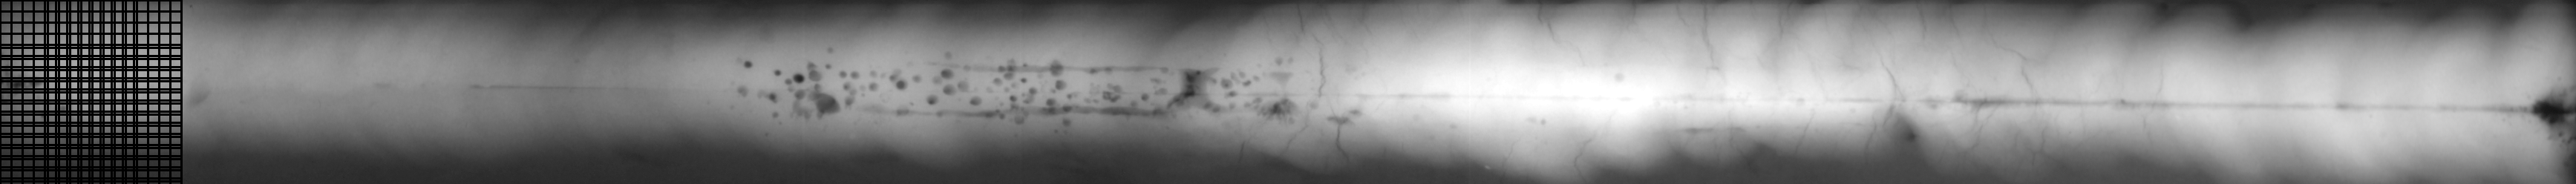

In [0]:
i=64
height = finalimage.shape[0]
width = finalimage.shape[1]
while(i<height):
  j=64
  while(j<width):
    img2pred = finalimage[i-64:i,j-64:j]
    img2pred = img2pred.reshape(1,64,64,1)
    loss = model.evaluate(img2pred,img2pred,verbose=0)      
    if loss>(4e-05):
      cv2.rectangle(finalimage,(i-64,j-64),(i,j),(0,255,0),2)
    j+=15
  i+=15
cv2_imshow(finalimage)

In [0]:
xtest = Xpos[632].copy()
xtest = xtest.reshape(1,64,64,1)
predictions = autoencoder.predict(xtest)

In [0]:
print(len(predictions[0][0]))

64


In [0]:
prediction = predictions[0]
prediction *= 255 

In [0]:
xcomp = Xpos[632].copy()
xcomp = xcomp.reshape(64,64)

In [0]:
xcomp = xcomp *255 

In [0]:
prediction = prediction.reshape(64,64)

In [0]:
cv2_imshow(xcomp)

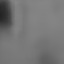

In [0]:
cv2_imshow(prediction)

In [0]:
xcomp = np.array(xcomp.flatten()).reshape(1,4096)
prediction = np.array(prediction.flatten()).reshape(1,4096)

In [0]:
import sklearn
from sklearn import metrics
print(metrics.pairwise.cosine_similarity(np.array(xcomp),np.array(prediction)))

[[0.99990103]]


In [0]:
automodel1 = Sequential()

automodel1.add(Dense(4096,input_shape=(4096,),activation='relu'))
automodel1.add(Dense(1024,activation='relu'))
automodel1.add(Dense(256,activation='relu'))

automodel1.add(Dense(128,activation='sigmoid'))

automodel1.add(Dense(256,activation='relu'))
automodel1.add(Dense(512,activation='relu'))
automodel1.add(Dense(2048,activation='relu'))
automodel1.add(Dense(4096,activation='sigmoid'))

In [0]:
automodel1.compile(loss = 'mse',optimizer='adam')

In [0]:
Xpos = Xpos.reshape(4069,4096)

In [0]:
automodel1.fit(Xpos,Xpos,epochs=10,batch_size=32,validation_split=0.1)

Train on 3662 samples, validate on 407 samples
Epoch 1/10
3662/3662 [==============================] - 5s 1ms/step - loss: 0.0018 - val_loss: 5.5907e-04
Epoch 2/10
3662/3662 [==============================] - 3s 870us/step - loss: 0.0014 - val_loss: 5.5213e-04
Epoch 3/10
3662/3662 [==============================] - 3s 870us/step - loss: 0.0014 - val_loss: 6.2136e-04
Epoch 4/10
3662/3662 [==============================] - 3s 877us/step - loss: 0.0014 - val_loss: 5.6376e-04
Epoch 5/10
3662/3662 [==============================] - 3s 870us/step - loss: 0.0014 - val_loss: 6.5415e-04
Epoch 6/10
3662/3662 [==============================] - 3s 849us/step - loss: 0.0014 - val_loss: 6.0215e-04
Epoch 7/10
3662/3662 [==============================] - 3s 880us/step - loss: 0.0014 - val_loss: 6.3959e-04
Epoch 8/10
3662/3662 [==============================] - 3s 880us/step - loss: 0.0014 - val_loss: 6.6185e-04
Epoch 9/10
3662/3662 [==============================] - 3s 879us/step - loss: 0.0014 - val_

In [0]:
Xneg = Xneg.reshape(87955,4096)

In [0]:
automodel1.evaluate(Xneg[42:43],Xneg[42:43])

1/1 [==============================] - 0s 3ms/step


9.951287938747555e-05

In [0]:
automodel1.evaluate(Xpos[42:43],Xpos[42:43])

1/1 [==============================] - 0s 5ms/step


0.000272208359092474